# TIM - TP 4 : Détection de contours

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift

path_base =  '..//Base_images//'

# 1-Cas monodimensionnel
Le but de cette partie est de vous montrer le point de départ du filtrage d'une manière en imagerie, qui n'est d'autre que le filtrage des signaux 1D. Cette partie vous permettra également de comprendre en 1D l'operation de détection de contours pour pouvoir la généraliser au cas 2D (images)

Créez deux fonctions mono-dimensionnelles représantant un contour type "saut d'amplitude" et un contour "en toit". 

<Figure size 432x288 with 0 Axes>

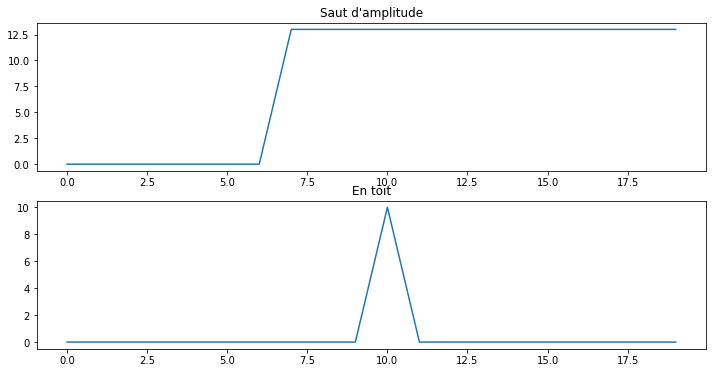

In [2]:
# A compléter
# Création de la fonction "saut d'amplitude"
def saut_amplitude(plage):
    vect=np.zeros((plage),dtype=np.int16)
    for i in range(plage):
        if (i>plage//3):
            vect[i]=2*plage//3
    return vect

# Création de la fonction "en toit"
def en_toit(plage):
    vect=np.zeros((plage),dtype=np.int16)
    vect[plage//2]=plage//2
    return vect
plt.figure()
plt.subplots(2,1,figsize=(12,6))
plt.subplot(211)
plt.plot(saut_amplitude(20))
plt.title("Saut d'amplitude")
plt.subplot(212)
plt.plot(en_toit(20))
plt.title("En toit")
plt.show()

Pour chacune de ces fonctions vous calculerez les dérivées premières et secondes et pour cela, utilisez la fonction diff de Python pour le calcul de la dérivée. Que fait cette fonction au juste et quel est son lien avec la définition de la dérivée.

<Figure size 432x288 with 0 Axes>

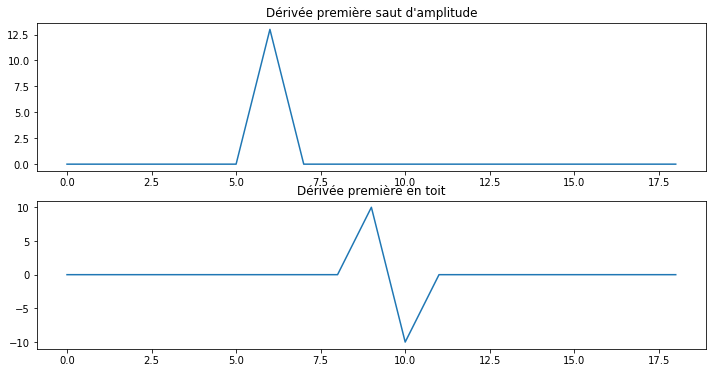

<Figure size 432x288 with 0 Axes>

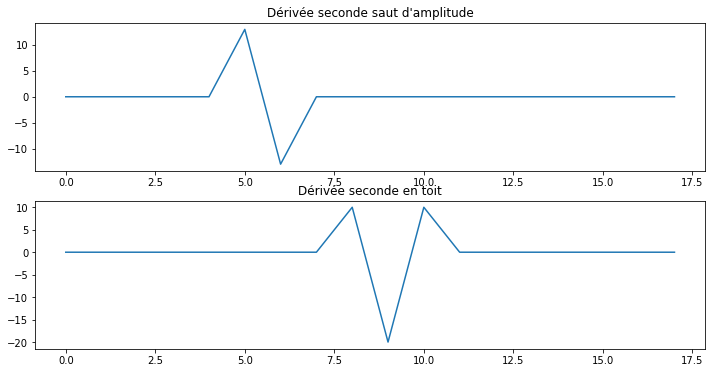

In [3]:
# A compléter
# Calcul de la dérivée première des 2 fonctions
plt.figure()
plt.subplots(2,1,figsize=(12,6))
plt.subplot(211)
plt.plot(np.diff(saut_amplitude(20)))
plt.title("Dérivée première saut d'amplitude")
plt.subplot(212)
plt.plot(np.diff(en_toit(20)))
plt.title("Dérivée première en toit")
plt.show()

# Calcul de la dérivée seconde des 2 fonctions
plt.figure()
plt.subplots(2,1,figsize=(12,6))
plt.subplot(211)
plt.plot(np.diff(np.diff(saut_amplitude(20))))
plt.title("Dérivée seconde saut d'amplitude")
plt.subplot(212)
plt.plot(np.diff(np.diff(en_toit(20))))
plt.title("Dérivée seconde en toit")
plt.show()

**_Réponse :_** La fonction diff de numpy sur le vecteur t applique l'opération t'[i] = t[i+1]-t[i]. On obtient donc un vecteur de taille len(t)-1, qui correspond à la dérivée du vecteur t.

Que se passe t-il à la dérivée seconde à l'endroit du contour (changement brusque d'intensité)

**_Réponse :_** A l'endroit du contour, on observe que la dérivée seconde passe par 0.

# 2-Opérateurs dérivées du premier ordre
Utilisez une palette 256 niveaux de gris pour l'affichage de vos traitement. N'oubliez pas de faire attention au type de variables quand il s'agit d'un calcul de dérivée. Les donnée peuvent être négatives.

Calculez la norme du gradient de l'image "cameraman.tif" : pour cela, calculez les dérivées directionnelles (dx, dy) ainsi que la norme du gradient.

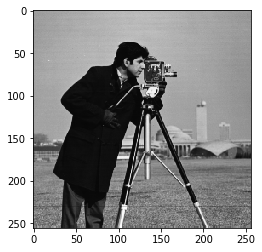

In [4]:
# A compléter
# Chargement de cameraman.tif
cameraman = cv2.imread(path_base+'cameraman.tif',-1).astype(float)
plt.figure()
plt.imshow(cameraman,'gray',vmin=0,vmax=255)

In [5]:
def norme_grad(I):
    # Calcul des dérivées directionnelles de cameraman.tif
    dx,dy = np.gradient(I)

    # Calcul de la norme du gradient de cameraman.tif
    norme_gradient = np.sqrt(np.power(dx,2)+np.power(dy,2))
    
    return norme_gradient,(dx,dy)

norme_gradient,(dx,dy) = norme_grad(cameraman)

Affichez et interprétez l'allure de chaque dérivée calculée.

<Figure size 432x288 with 0 Axes>

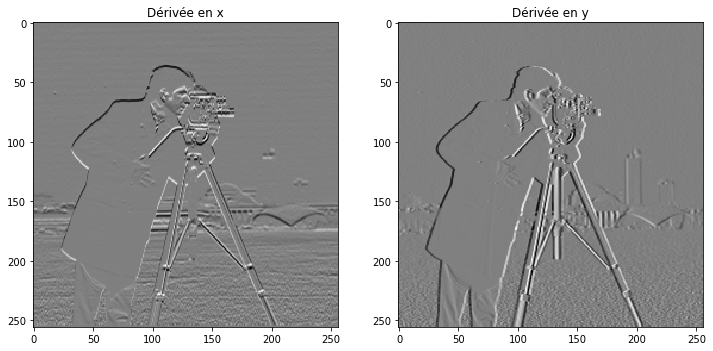

<Figure size 432x288 with 0 Axes>

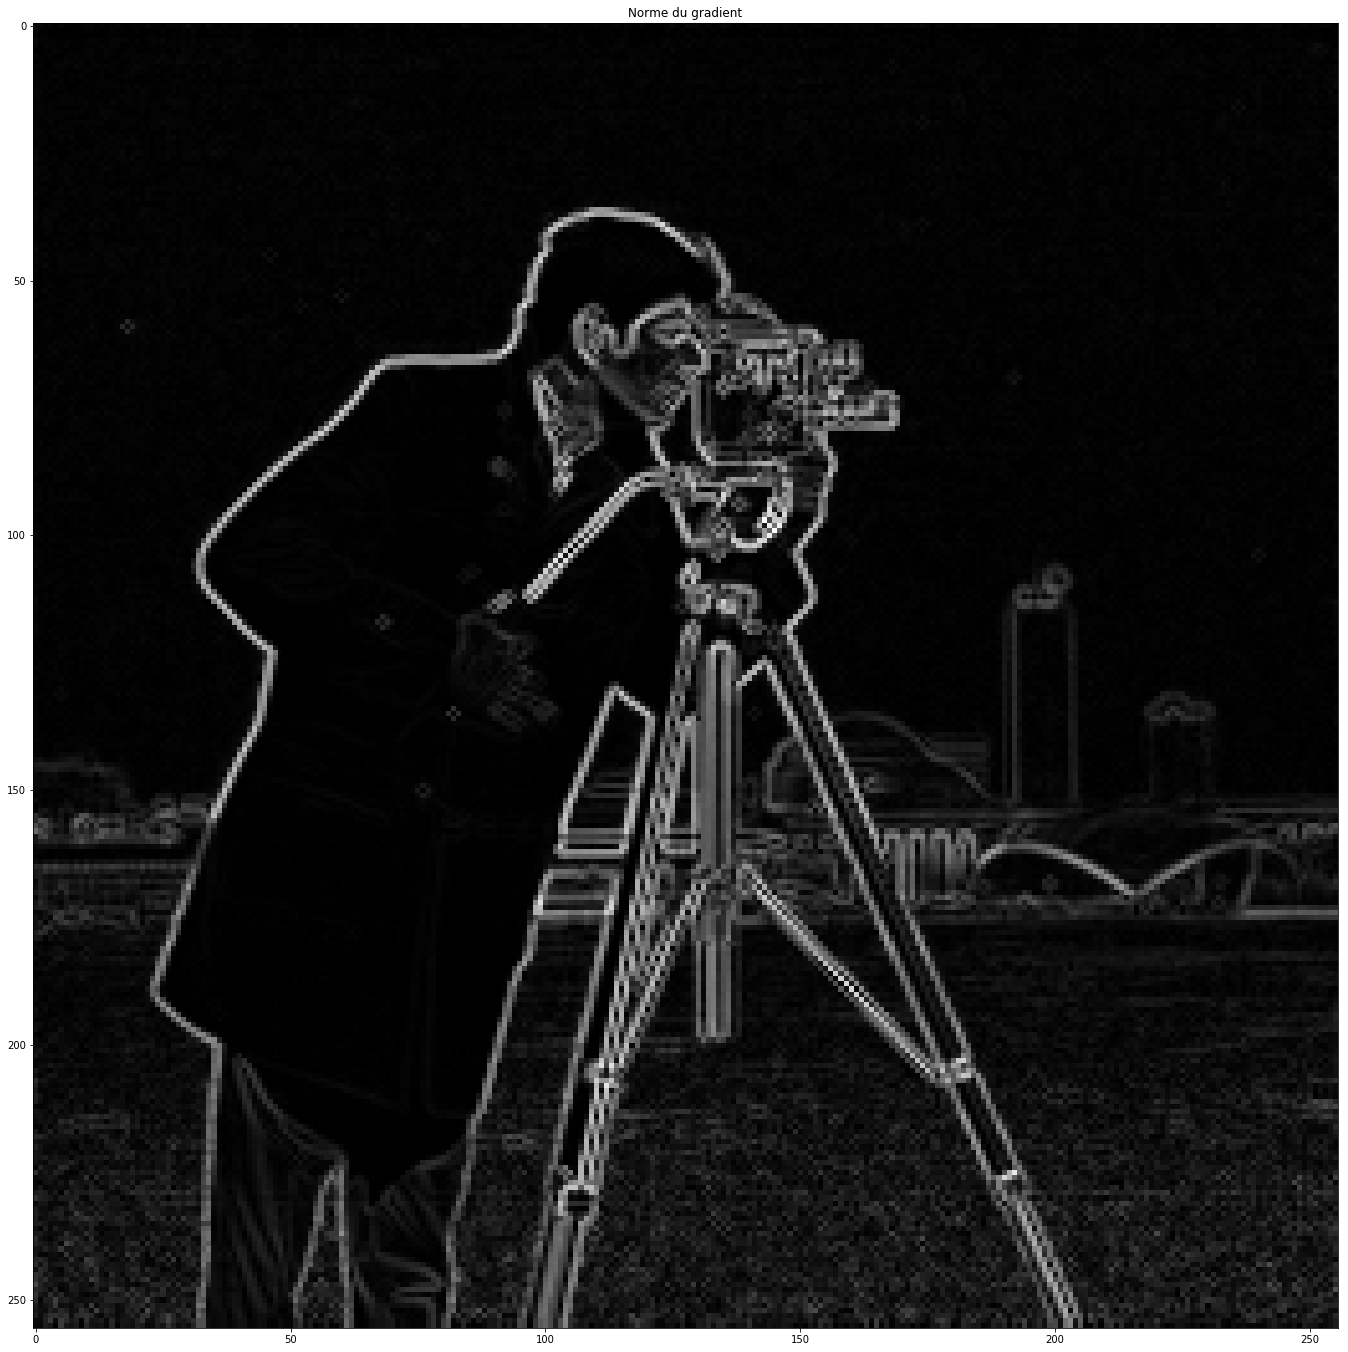

In [6]:
# A compléter
# Affichage des dérivées calculées
plt.figure()
plt.subplots(1,2,figsize=(12,12))
plt.subplot(121)
plt.imshow(dx,'gray')
plt.title("Dérivée en x")
plt.subplot(122)
plt.imshow(dy,'gray')
plt.title("Dérivée en y")
plt.show()

plt.figure()
plt.subplots(1,1,figsize=(24,24))
plt.imshow(norme_gradient,'gray')
plt.title("Norme du gradient")
plt.show()

**_Réponse :_** Pour les dérivées en x et y, l'image est en grande partie grise (valeurs avoisinants zéro). Les contours ressortent en noir (valeurs négatives) et en blanc(valeurs positives). Ces valeurs sont obtenues par les fortes variations entre 2 pixels. 
Pour la norme du gradient, on obtient les contours en blanc (valeurs fortement positives) et la majorité des pixels sont noirs (valeurs faibles).

Mêmes questions avec les opérateurs de Sobel et Prewitt (n'hésitez pas à utiliser la fonction filter2D d'OpenCV).

In [7]:
# A compléter
# Calcul de la norme du gradient via Sobel et Prewitt et affichage des résultats

def Sobel(I):
    # Filtres de Sobel
    Sob_x=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=np.float64)
    Sob_y=np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float64)

    # Dérivées directionnelles de Sobel
    Sob_dx = cv2.filter2D(I,-1,Sob_x)
    Sob_dy = cv2.filter2D(I,-1,Sob_y)

    # Norme du gradient via Sobel
    Sob_norme_gradient = np.sqrt(np.power(Sob_dx,2)+np.power(Sob_dy,2))

    return Sob_norme_gradient,(Sob_dx,Sob_dy)

def Prewitt(I):
    # Filtres de Prewitt
    Prew_x=np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=np.float64)
    Prew_y=np.array([[1,0,-1],[1,0,-1],[1,0,-1]],dtype=np.float64)

    # Dérivées directionnelles de Prewitt
    Prew_dx = cv2.filter2D(I,-1,Prew_x)
    Prew_dy = cv2.filter2D(I,-1,Prew_y)

    # Norme du gradient via Prewitt
    Prew_norme_gradient = np.sqrt(np.power(Prew_dx,2)+np.power(Prew_dy,2))
    
    return Prew_norme_gradient,(Prew_dx,Prew_dy)

Sob_norme_gradient,(Sob_dx,Sob_dy)=Sobel(cameraman)
Prew_norme_gradient,(Prew_dx,Prew_dy)=Prewitt(cameraman)

<Figure size 432x288 with 0 Axes>

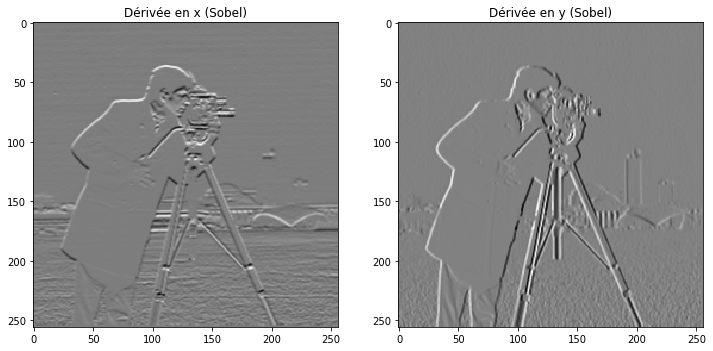

<Figure size 432x288 with 0 Axes>

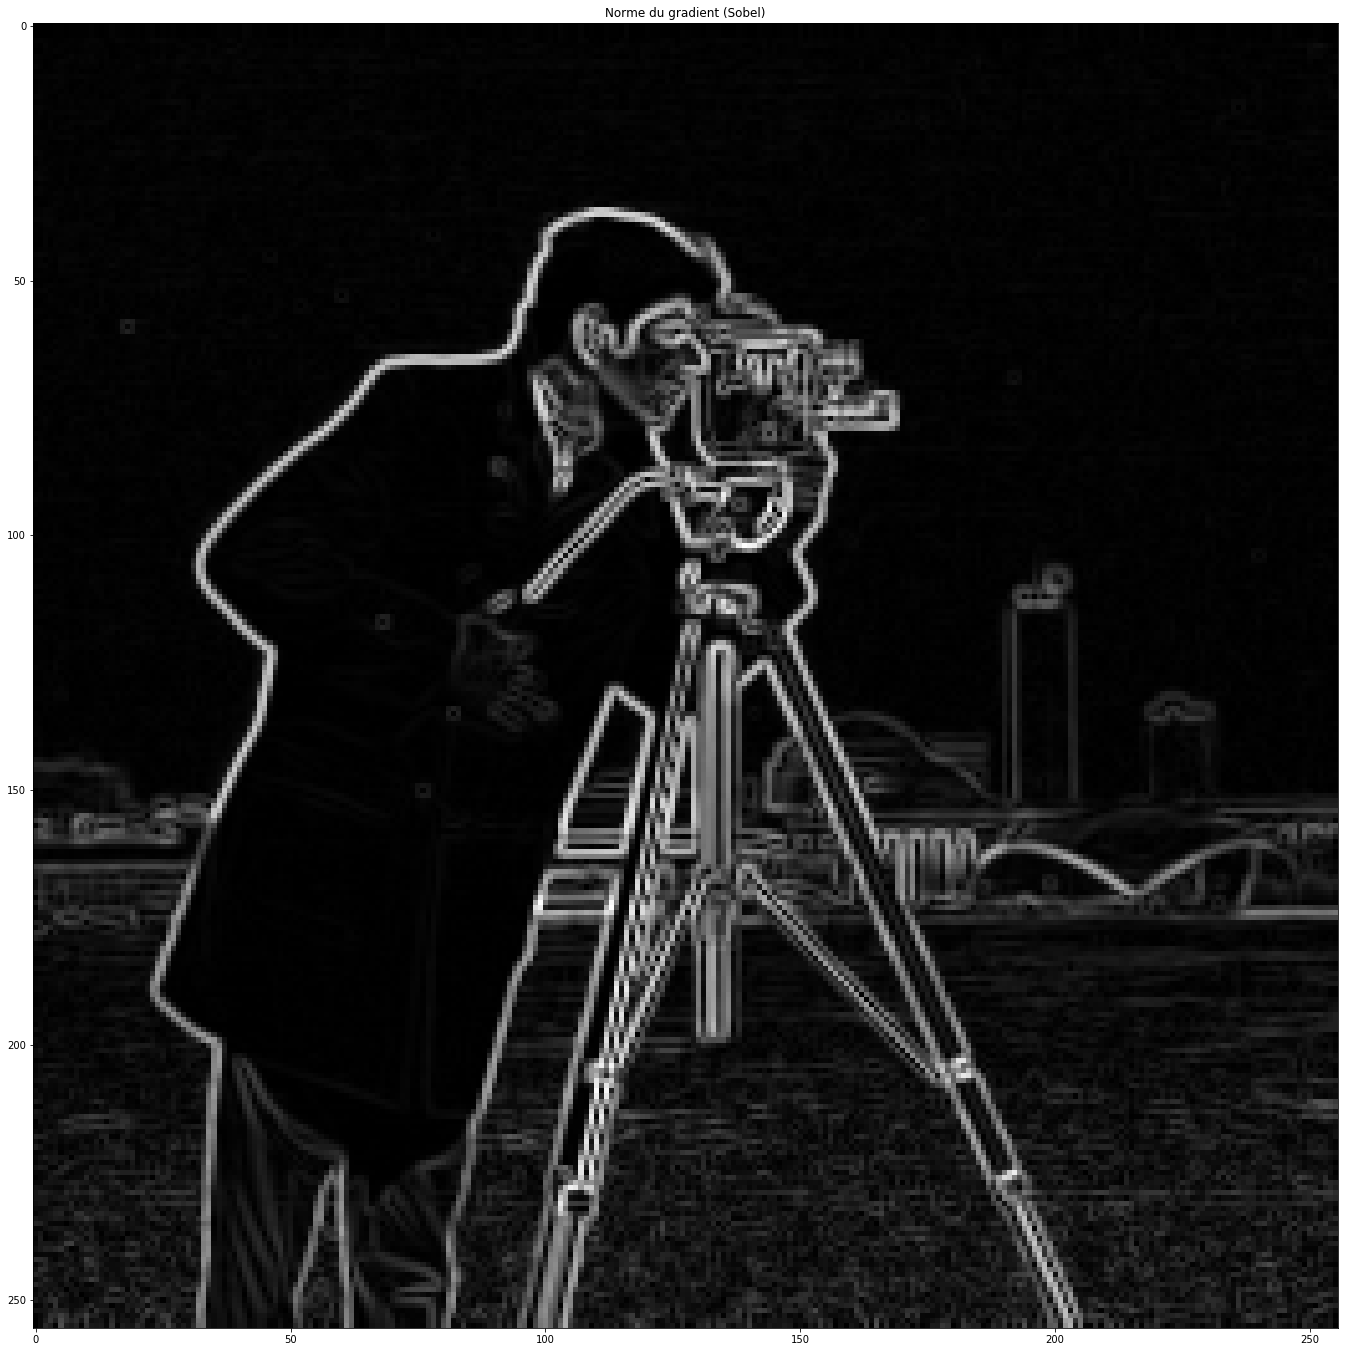

In [8]:
# Affichage des dérivées calculées (Sobel)
plt.figure()
plt.subplots(1,2,figsize=(12,12))
plt.subplot(121)
plt.imshow(Sob_dx,'gray')
plt.title("Dérivée en x (Sobel)")
plt.subplot(122)
plt.imshow(Sob_dy,'gray')
plt.title("Dérivée en y (Sobel)")
plt.show()

plt.figure()
plt.subplots(1,1,figsize=(24,24))
plt.imshow(Sob_norme_gradient,'gray')
plt.title("Norme du gradient (Sobel)")
plt.show()

<Figure size 432x288 with 0 Axes>

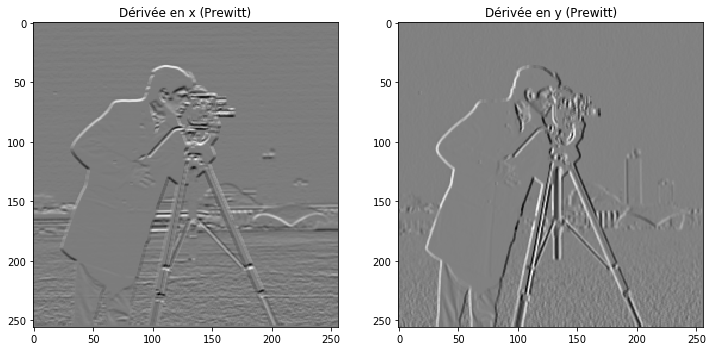

<Figure size 432x288 with 0 Axes>

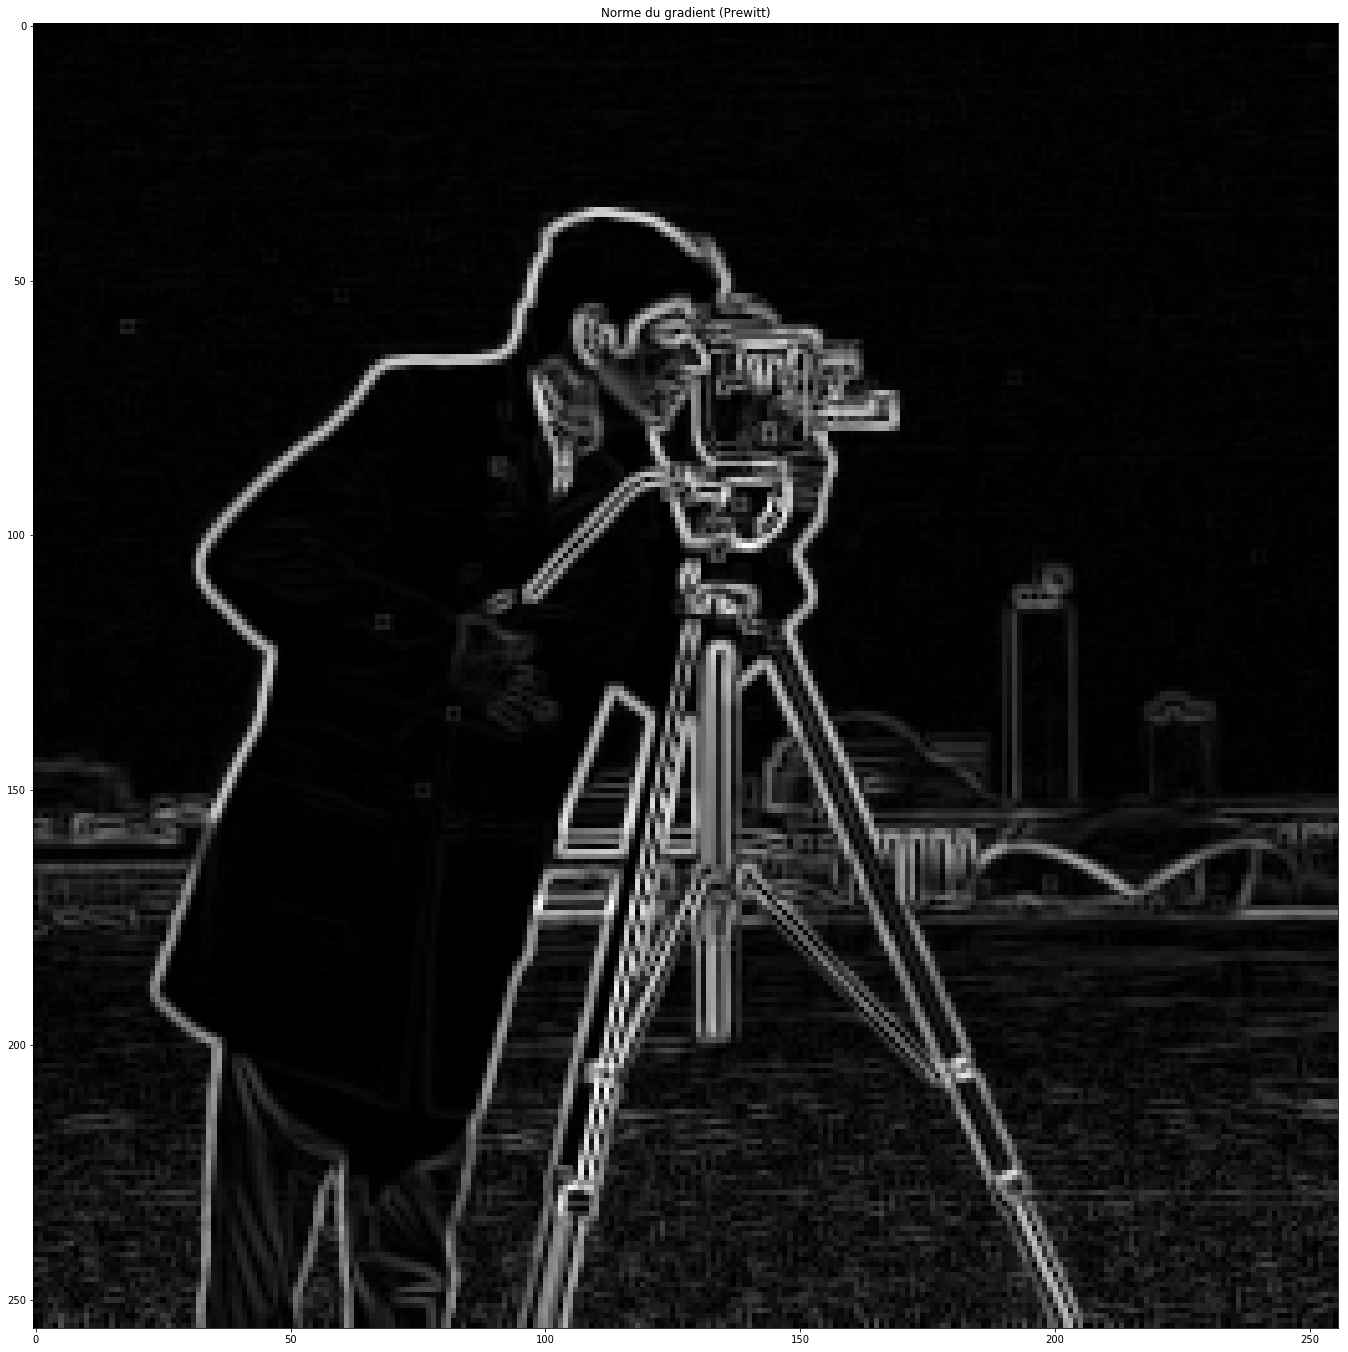

In [9]:
# Affichage des dérivées calculées (Prewitt)
plt.figure()
plt.subplots(1,2,figsize=(12,12))
plt.subplot(121)
plt.imshow(Prew_dx,'gray')
plt.title("Dérivée en x (Prewitt)")
plt.subplot(122)
plt.imshow(Prew_dy,'gray')
plt.title("Dérivée en y (Prewitt)")
plt.show()

plt.figure()
plt.subplots(1,1,figsize=(24,24))
plt.imshow(Prew_norme_gradient,'gray')
plt.title("Norme du gradient (Prewitt)")
plt.show()

**_Réponse :_** On obtient des résultats similaires, du moins à vu d'oeil. Les résultats obtenus ne sont pas exactement les mêmes, notamment avec le filtre de Prewitt qui renvoit une norme du gradient avec plus de contraste.

# 3. Opérateurs dérivées du second ordre 

Appliquez l'opérateur Laplacien sur  "cameraman.tif" 

<Figure size 432x288 with 0 Axes>

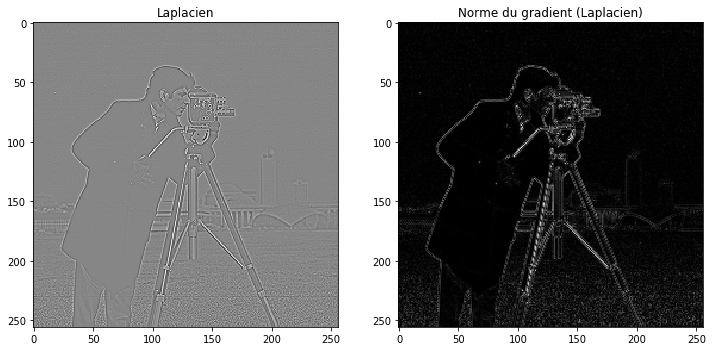

In [10]:
# A compléter
# Application de l'opérateur Laplacien sur cameraman.tif
def Laplacien(I):
    Laplacien=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],dtype=np.float64)
    Lap_I=cv2.filter2D(I,-1,Laplacien)
    norme_I = np.linalg.norm([Lap_I],axis=0)
    return norme_I,Lap_I

norme_laplacian_cameraman,Laplacian_cameraman=Laplacien(cameraman)

plt.figure()
plt.subplots(1,2,figsize=(12,12))
plt.subplot(121)
plt.imshow(Laplacian_cameraman,'gray')
plt.title("Laplacien")
plt.subplot(122)
plt.imshow(norme_laplacian_cameraman,'gray')
plt.title("Norme du gradient (Laplacien)")
plt.show()

Appliquez l’opérateur différence de deux gaussiennes (DOG) (avec N=3 taille du filtre et sigma = 0.6 pour la première gaussienne et N=3 et sigma = 0.9 pour la deuxième gaussienne). Vous pouvez vous faire aider par une fonction qui crée le masque gaussien que vous souhaiteriez :

In [11]:
def masque_gaussien(N,sig):
    h=np.zeros((N,N),dtype=np.float)
    x=np.linspace(-round(N//2),round(N//2),N)
    y=np.linspace(-round(N//2),round(N//2),N)
    for i in range (len(x)):
        for j in range (len(y)):
            h[i,j]=16*(np.exp(-(x[i]*x[i]+y[j]*y[j])//(2*sig*sig)))//(2*np.pi*sig*sig)+1
    return h

<Figure size 432x288 with 0 Axes>

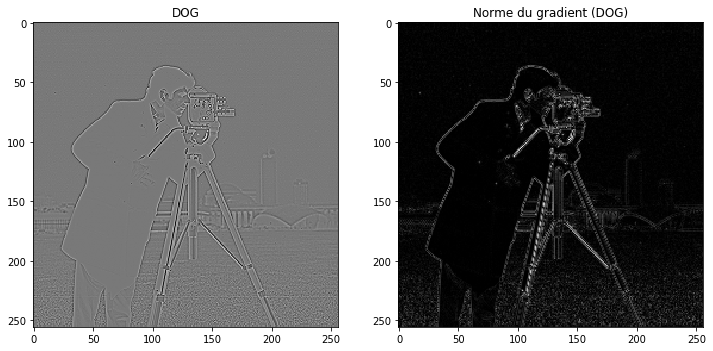

In [12]:
# A compléter
# Application de la DOG sur cameraman.tif

def DOG(I):
    Gauss1=masque_gaussien(3,0.6)
    Gauss2=masque_gaussien(3,0.9)
    DOG_I=cv2.filter2D(I,-1,Gauss2-Gauss1)
    norme_DOG = np.linalg.norm([DOG_I],axis=0)
    return norme_DOG,DOG_I

norme_DOG_camerman,DOG_cameraman = DOG(cameraman)

plt.figure()
plt.subplots(1,2,figsize=(12,12))
plt.subplot(121)
plt.imshow(DOG_cameraman,'gray')
plt.title("DOG")
plt.subplot(122)
plt.imshow(norme_DOG_camerman,'gray')
plt.title("Norme du gradient (DOG)")
plt.show()

# 4. Extraction de contours par seuillage
Réalisez un seuillage pour les opérateurs dérivée premier ordre

In [13]:
# Fonction de seuillage
def seuillage(I,seuil=None):
    uint8_I = (255*((I-I.min())/(I.max()-I.min()))).astype(np.uint8)
    return uint8_I>seuil

<Figure size 432x288 with 0 Axes>

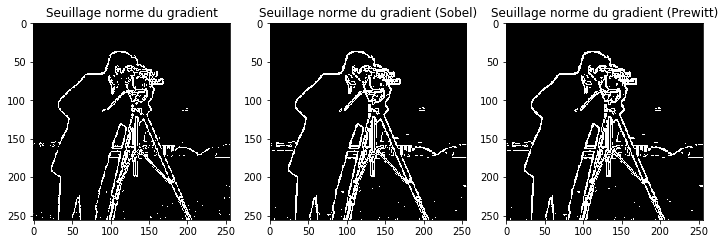

In [14]:
# A compléter
# Seuillage pour les opérateurs du 1er ordre
plt.figure()
plt.subplots(1,3,figsize=(12,12))
plt.subplot(131)
plt.imshow(seuillage(norme_gradient,60),'gray')
plt.title("Seuillage norme du gradient")
plt.subplot(132)
plt.imshow(seuillage(Sob_norme_gradient,60),'gray')
plt.title("Seuillage norme du gradient (Sobel)")
plt.subplot(133)
plt.imshow(seuillage(Prew_norme_gradient,60),'gray')
plt.title("Seuillage norme du gradient (Prewitt)")
plt.show()

Réalisez un seuillage pour les opérateurs dérivée deuxième ordre.

<Figure size 432x288 with 0 Axes>

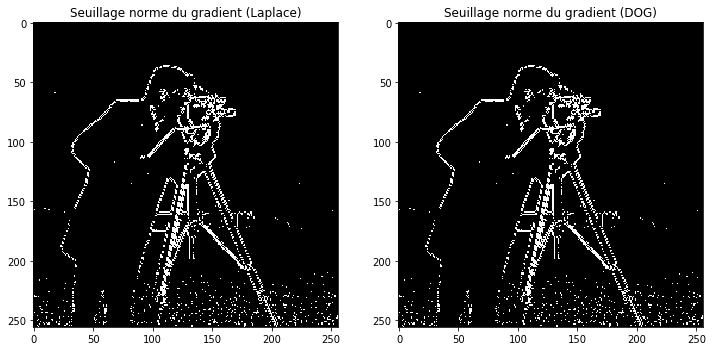

In [15]:
# A compléter
# Seuillage pour les opérateurs du 2ème ordre
plt.figure()
plt.subplots(1,2,figsize=(12,12))
plt.subplot(121)
plt.imshow(seuillage(norme_laplacian_cameraman,50),'gray')
plt.title("Seuillage norme du gradient (Laplace)")
plt.subplot(122)
plt.imshow(seuillage(norme_DOG_camerman,50),'gray')
plt.title("Seuillage norme du gradient (DOG)")
plt.show()

Quelle différence présentent ces deux familles de détecteurs de contours ?

**_Réponse :_** On peut voir plus de bruit dans les résultats obtenus avec les opérateurs du 2nd degré, par rapport à ceux du 1er degré. Cependant, on ne fait qu'une opération sur l'image originale contrairement à 2 pour les opérateurs du 1er ordre. On gagne donc en temps d'exécution.

# 5. Mise en situation
Créez votre fonction EdgeExtractor(img,'méthode',seuil) retournant les contours de votre image selon la méthode précisée. Si le seuil n'est pas précisé, il sera calculé automatiquement.

In [16]:
# A compléter
# Création de la fonction EdgeExtractor
def edgeExtractor(img,methode,seuil=None):
    
    # Extraction des contours
    contours_img,__ = methode(img)
    
    # Seuillage des contours
    if seuil is not None:
        thresh_img = seuillage(contours_img,seuil)
    else:
        # Si le seuil n'est pas défini, on va ici faire une binarisation avec seuillage automatique (Otsu)
        uint8_img = (255*((contours_img-contours_img.min())/(contours_img.max()-contours_img.min()))).astype(np.uint8)
        seuil,thresh_img = cv2.threshold(uint8_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        print("Seuillage Otsu : {}".format(seuil))
    return thresh_img

Création de données : Choisissez une image de test de votre choix et bruitez là avec un bruit poivre et sel ( l'image Brain serait un bonheur à traiter).

<Figure size 432x288 with 0 Axes>

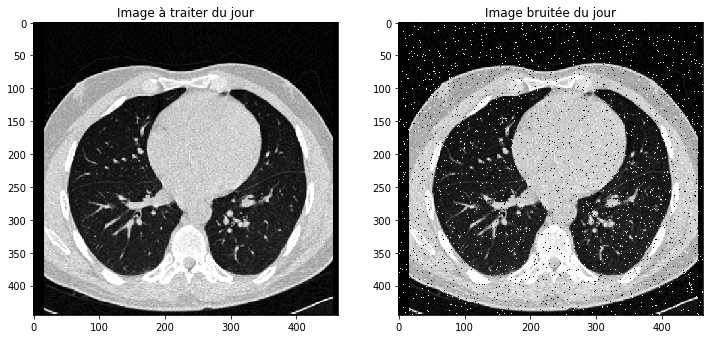

In [17]:
# A compléter
# Création de données
brain = cv2.imread(path_base+'brain.png',0)

def salt_and_pepper_noise(img,p):
    # Création masque aléatoire avec p% de 0 et (100-p)% de 1
    mask=(np.random.randint(100,size=img.shape)>p)
    # Image bruit avec aléatoirement du blanc et du noir
    new_img = np.random.randint(2,size=img.shape)*255
    # Tous les pixels de mask à 0, prennent la valeur de new_img (0 ou 255) dans l'image originale
    new_img[mask]=img[mask]
    return new_img.astype(np.uint8)

noisy_brain = salt_and_pepper_noise(brain,3)

plt.figure()
plt.subplots(2,1,figsize=(12,12))
plt.subplot(121)
plt.imshow(brain,'gray')
plt.title('Image à traiter du jour')
plt.subplot(122)
plt.imshow(noisy_brain,'gray')
plt.title('Image bruitée du jour')
plt.show()

Pré-traitement : Appliquez le moyen que vous jugerez necessaire pour améliorer la qualité de votre image.

Text(0.5, 1.0, 'Image prétraitée du jour')

<Figure size 432x288 with 0 Axes>

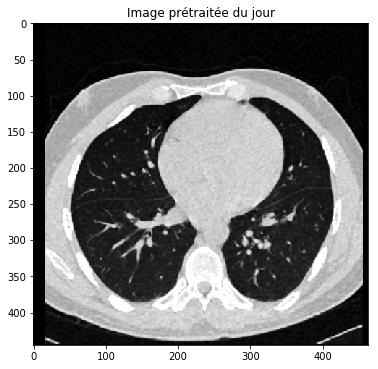

In [18]:
# A compléter
# Pré-traitement
def median_filter(img,n):
    return np.floor(np.nanmedian(np.stack([shift(img,(i-n//2,j-n//2),cval=np.NaN) for i,j in itertools.product(range(n),range(n))],axis=-1),axis=(-1))).astype(np.uint8)

preprocess_brain = median_filter(noisy_brain,3)

plt.figure()
plt.subplots(1,1,figsize=(6,6))
plt.imshow(preprocess_brain,'gray')
plt.title('Image prétraitée du jour')

Traitement : appliquez la méthode de votre choix pour détecter les contours de l'image.

Seuillage Otsu : 48.0


Text(0.5, 1.0, 'Image traitée du jour')

<Figure size 432x288 with 0 Axes>

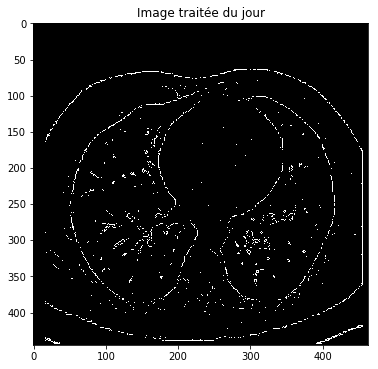

In [19]:
# A compléter
# Traitement
process_brain = edgeExtractor(preprocess_brain,Laplacien)

plt.figure()
plt.subplots(1,1,figsize=(6,6))
plt.imshow(process_brain,'gray')
plt.title('Image traitée du jour')

Post-traitement : a partir de votre image initiale, créez une image résultat en RGB et mettez en Rouge les contours détectés.

Text(0.5, 1.0, 'Résultat final')

<Figure size 432x288 with 0 Axes>

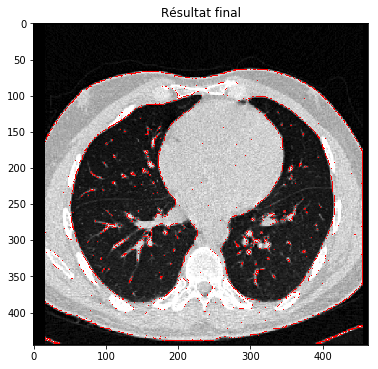

In [20]:
# A compléter
# Post-traitement
output = cv2.cvtColor(brain,cv2.COLOR_GRAY2RGB)
output[process_brain==255]=[255,0,0]
plt.figure()
plt.subplots(1,1,figsize=(6,6))
plt.imshow(output,'gray')
plt.title('Résultat final')